In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,average_precision_score
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering


In [2]:
car_data = pd.read_csv("car.csv") 



In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
buying      1151 non-null object
maint       1151 non-null object
doors       1151 non-null int64
persons     1151 non-null int64
lug_boot    1151 non-null object
safety      1151 non-null object
class       1151 non-null object
dtypes: int64(2), object(5)
memory usage: 63.0+ KB


In [4]:
y=car_data['class']
y=y.to_frame()
y.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [5]:
X=car_data
X= X[['buying','maint','doors','persons','lug_boot', 'safety']]
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [6]:
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        

In [7]:
combine=[y_train,y_test]
classmapping={'unacc':0,'acc':1,'good':2,'vgood':3}
for dt in combine:
   dt['class']=car_data['class'].map(classmapping)
y_train.head()

,class
834,0
29,0
745,0
165,0
248,0


In [8]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2,'vhigh':3}
for dt in combine:
   dt['maint']=car_data['maint'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
834,med,1,4,2,big,med
29,vhigh,3,3,4,med,low
745,med,2,3,2,big,high
165,vhigh,2,3,2,med,med
248,vhigh,1,3,4,big,low


In [9]:
combine=[X_train,X_test]
classmapping={'big':0,'small':1,'med':2}
for dt in combine:
   dt['lug_boot']=car_data['lug_boot'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
834,med,1,4,2,0,med
29,vhigh,3,3,4,2,low
745,med,2,3,2,0,high
165,vhigh,2,3,2,2,med
248,vhigh,1,3,4,0,low


In [10]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2}
for dt in combine:
   dt['safety']=car_data['safety'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
834,med,1,4,2,0,2
29,vhigh,3,3,4,2,1
745,med,2,3,2,0,0
165,vhigh,2,3,2,2,2
248,vhigh,1,3,4,0,1


In [11]:
combine=[X_train,X_test]
classmapping={'high':0,'low':1,'med':2,'vhigh':3}
for dt in combine:
   dt['buying']=car_data['buying'].map(classmapping)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
834,2,1,4,2,0,2
29,3,3,3,4,2,1
745,2,2,3,2,0,0
165,3,2,3,2,2,2
248,3,1,3,4,0,1


In [12]:
clf =KMeans(n_clusters=2, random_state=0)

In [13]:
clf.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [16]:
y_test.head()

,class
174,0
752,0
467,0
240,0
667,0


In [17]:
print(confusion_matrix(y_test, y_pred))  

[[106 163   0   0]
 [ 59   0   0   0]
 [  8   0   0   0]
 [ 10   0   0   0]]


In [18]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['unacc','acc','good','vgood'], 
                     columns = ['unacc','acc','good','vgood'])

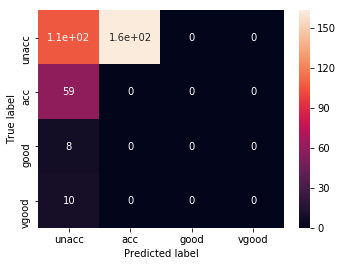

In [19]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
pprf1 = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Kmeans precision_recall_fscore_support ", pprf1)
pps1 = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Kmeans precision_score -> %.2f"%pps1)
prs1 = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Kmeans recall_score -> %.2f"%prs1)
pf1=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('Kmeans f1 score -> %.2f'%pf1)

Kmeans precision_recall_fscore_support  (0.1448087431693989, 0.09851301115241635, 0.1172566371681416, None)
Kmeans precision_score -> 0.14
Kmeans recall_score -> 0.10
f1_score 0.1172566371681416
Kmeans f1 score -> 0.12


In [21]:
clf = AgglomerativeClustering()

In [22]:
clf.fit(X_train,y_train)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')

In [23]:
print(clf.labels_)  


[0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 0 0 1 

In [24]:
clf.fit_predict(y_test) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [25]:
print(confusion_matrix(y_test, y_pred))  

[[106 163   0   0]
 [ 59   0   0   0]
 [  8   0   0   0]
 [ 10   0   0   0]]


In [26]:
cm=confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['unacc','acc','good','vgood'], 
                     columns = ['unacc','acc','good','vgood'])

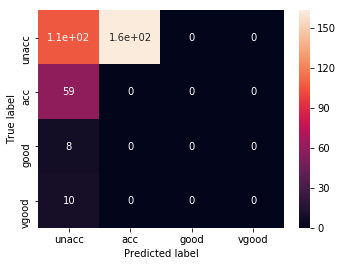

In [27]:
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
pprf2 = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Agglomerative Clustering precision_recall_fscore_support ", pprf2)
pps2 = precision_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Agglomerative Clustering precision_score -> %.2f"%pps2)
prs2 = recall_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("Agglomerative Clustering recall_score -> %.2f"%prs2)
pf12=f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None)
print("f1_score",f1_score(y_test, y_pred, labels=None, pos_label=1, average='macro', sample_weight=None))
print('Agglomerative Clustering f1 score -> %.2f'%pf12)

Agglomerative Clustering precision_recall_fscore_support  (0.1448087431693989, 0.09851301115241635, 0.1172566371681416, None)
Agglomerative Clustering precision_score -> 0.14
Agglomerative Clustering recall_score -> 0.10
f1_score 0.1172566371681416
Agglomerative Clustering f1 score -> 0.12


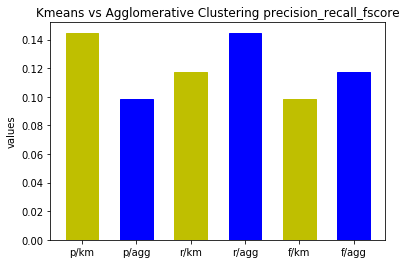

In [30]:
barlist=plt.bar(['p/km','p/agg','r/km','r/agg','f/km','f/agg'],[pps1,prs1,pf1,pps2,prs2,pf12],align='center', alpha=1.0,width=.6)
barlist[0].set_color('y')
barlist[2].set_color('y')
barlist[4].set_color('y')
barlist[1].set_color('b')
barlist[3].set_color('b')
barlist[5].set_color('b')
plt.ylabel('values')
plt.title('Kmeans vs Agglomerative Clustering precision_recall_fscore')
plt.show()
